# Importación y Exploración de Datos

En esta sección, cargaremos los datos y exploraremos su estructura inicial para entender qué transformaciones y análisis se requieren.


In [ ]:
import pandas as pd

# Cargar el archivo para ver su estructura y contenido
file_path = '/content/gdp_by_industry.csv'
data = pd.read_csv(file_path)

# Visualizar las primeras filas para comprender los datos
data.head()


,TableID,Frequency,Year,Quarter,Industry,IndustrYDescription,DataValue,NoteRef
0,1,A,2017,2017,11,"Agriculture, forestry, fishing, and hunting",176.8,1
1,1,A,2017,2017,111CA,Farms,138.7,1
2,1,A,2017,2017,113FF,"Forestry, fishing, and related activities",38.1,1
3,1,A,2017,2017,21,Mining,267.3,1
4,1,A,2017,2017,211,Oil and gas extraction,161.1,1


# Limpieza de Datos

Verificamos la presencia de valores nulos, estandarizamos nombres de columnas y revisamos los tipos de datos. Esto es fundamental para asegurar que el dataset esté listo para el análisis posterior.


In [ ]:
# Renombrar columnas para facilitar el análisis y estandarizar los nombres
data.columns = data.columns.str.strip().str.lower()

# Revisar valores nulos y tipos de datos para una limpieza inicial
missing_values = data.isnull().sum()
data_info = data.dtypes

missing_values, data_info


(tableid                0
 frequency              0
 year                   0
 quarter                0
 industry               0
 industrydescription    0
 datavalue              0
 noteref                0
 dtype: int64,
 tableid                  int64
 frequency               object
 year                     int64
 quarter                  int64
 industry                object
 industrydescription     object
 datavalue              float64
 noteref                 object
 dtype: object)

In [ ]:
# Diccionario para agrupar categorías en sectores amplios
industry_groups = {
    # Sector Primario
    'Agriculture, forestry, fishing, and hunting': 'Sector Primario',
    'Farms': 'Sector Primario',
    'Forestry, fishing, and related activities': 'Sector Primario',
    'Mining': 'Sector Primario',
    'Oil and gas extraction': 'Sector Primario',
    'Mining, except oil and gas': 'Sector Primario',
    'Support activities for mining': 'Sector Primario',

    # Sector Secundario
    'Manufacturing': 'Sector Secundario',
    'Food and beverage and tobacco products': 'Sector Secundario',
    'Textile mills and textile product mills': 'Sector Secundario',
    'Apparel and leather and allied products': 'Sector Secundario',
    'Petroleum and coal products': 'Sector Secundario',
    'Chemical products': 'Sector Secundario',
    'Wood products': 'Sector Secundario',
    'Paper products': 'Sector Secundario',
    'Machinery': 'Sector Secundario',
    'Motor vehicles, bodies and trailers, and parts': 'Sector Secundario',
    'Durable goods': 'Sector Secundario',
    'Nondurable goods': 'Sector Secundario',

    # Sector Terciario
    'Wholesale trade': 'Sector Terciario',
    'Retail trade': 'Sector Terciario',
    'Air transportation': 'Sector Terciario',
    'Rail transportation': 'Sector Terciario',
    'Truck transportation': 'Sector Terciario',
    'Warehousing and storage': 'Sector Terciario',
    'Information': 'Sector Terciario',
    'Publishing industries, except internet (includes software)': 'Sector Terciario',
    'Motion picture and sound recording industries': 'Sector Terciario',
    'Data processing, internet publishing, and other information services': 'Sector Terciario',

    # Sector Cuaternario
    'Professional, scientific, and technical services': 'Sector Cuaternario',
    'Legal services': 'Sector Cuaternario',
    'Computer systems design and related services': 'Sector Cuaternario',
    'Management of companies and enterprises': 'Sector Cuaternario',
    'Educational services': 'Sector Cuaternario',
    'Health care and social assistance': 'Sector Cuaternario',

    # Sector Público
    'Government': 'Sector Público',
    'Federal': 'Sector Público',
    'State and local': 'Sector Público',
    'General government': 'Sector Público',
    'National defense': 'Sector Público',
    'Nondefense': 'Sector Público',

    # Bienes Raíces y Servicios Financieros
    'Finance and insurance': 'Bienes Raíces y Servicios Financieros',
    'Real estate and rental and leasing': 'Bienes Raíces y Servicios Financieros',
    'Insurance carriers and related activities': 'Bienes Raíces y Servicios Financieros',
    'Federal Reserve banks, credit intermediation, and related activities': 'Bienes Raíces y Servicios Financieros',
    'Funds, trusts, and other financial vehicles': 'Bienes Raíces y Servicios Financieros',

    # Energía y Servicios Públicos
    'Utilities': 'Energía y Servicios Públicos',
    'Pipeline transportation': 'Energía y Servicios Públicos',

    # Otros
    'Gross domestic product': 'Otros',
    'Private industries': 'Otros',
    'Compensation of employees': 'Otros',
    'Taxes on production and imports less subsidies': 'Otros',
    'Gross operating surplus': 'Otros',
}

# Crear la nueva columna con la agrupación
data['sector_group'] = data['industry_description'].map(industry_groups)


# Visualizar las primeras filas del archivo limpio y agrupado
data.head()

KeyError: 'industry_description'

# Estadísticas Descriptivas por Categoría

Calculamos estadísticas descriptivas de `DataValue` para cada una de las 8 categorías principales. Esto nos ayuda a comprender la variabilidad y distribución de los datos en cada sector.


In [ ]:
# Calcular estadísticas descriptivas por categoría principal
category_stats = data.groupby('new_main_category')['datavalue'].describe()

# Mostrar los resultados
category_stats


,count,mean,std,min,25%,50%,75%,max
new_main_category,,,,,,,,
Agricultura y Recursos Naturales,1315.0,79.766751,101.313817,-45.5,0.1750,73.6720,104.30000,608.0
Comercio,390.0,339.878387,626.477615,-12.7,0.9250,100.0000,110.20300,2538.0
Construcción,195.0,280.282021,499.252463,-2.4,1.5500,100.0000,110.71400,1990.2
Finanzas y Seguros,185.0,485.358438,898.640338,-2.4,1.0800,100.0000,112.05300,3337.4
Manufactura de Bienes Industriales,1500.0,228.600797,743.697997,-35.8,0.1375,85.2035,104.19425,6288.2
Manufactura de Bienes de Consumo,555.0,89.118040,182.786562,-30.6,0.0150,18.1000,100.95100,1086.3
Otros Servicios,25465.0,315.929648,1825.428061,-234.8,2.1000,42.0000,104.96800,41809.3
Servicios Profesionales y Administrativos,565.0,393.999308,907.733546,-11.3,0.9000,100.0000,109.32000,4794.1
Servicios Públicos,195.0,112.114764,147.782790,-17.2,0.0850,100.0000,116.29300,594.2


# Tendencias Temporales de `DataValue` por Categoría

Generamos un gráfico de líneas para visualizar las tendencias temporales de `DataValue` para cada una de las 8 categorías principales. Esto facilita el análisis de patrones a lo largo del tiempo en cada sector.


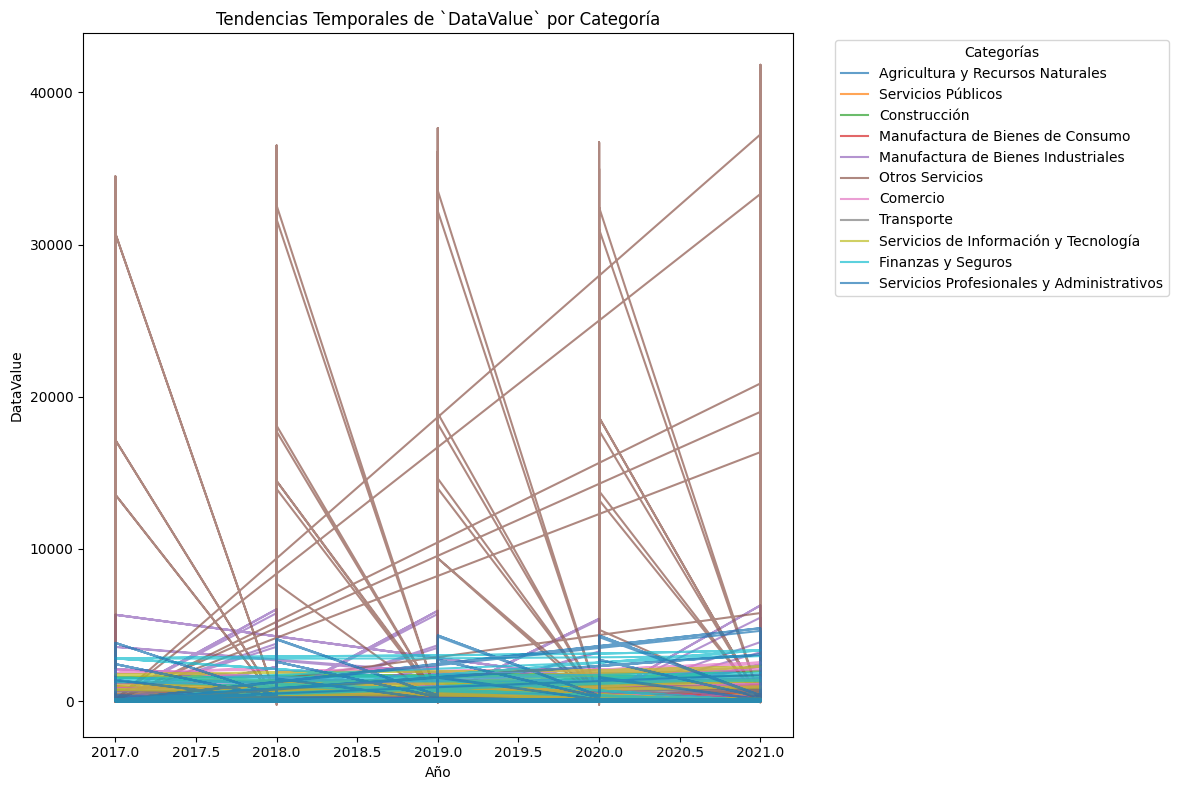

In [ ]:
import matplotlib.pyplot as plt

# Configurar el tamaño de los gráficos
plt.figure(figsize=(12, 8))

# Graficar la tendencia temporal de `DataValue` por cada categoría
for category in data['new_main_category'].unique():
    subset = data[data['new_main_category'] == category]
    plt.plot(subset['year'], subset['datavalue'], label=category, alpha=0.7)

# Configuraciones de la gráfica
plt.title("Tendencias Temporales de `DataValue` por Categoría")
plt.xlabel("Año")
plt.ylabel("DataValue")
plt.legend(title="Categorías", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()


# Distribuciones de `DataValue` por Categoría

Visualizamos la distribución de `DataValue` para cada una de las 8 categorías. Esto permite observar la dispersión de los datos y detectar posibles valores atípicos.


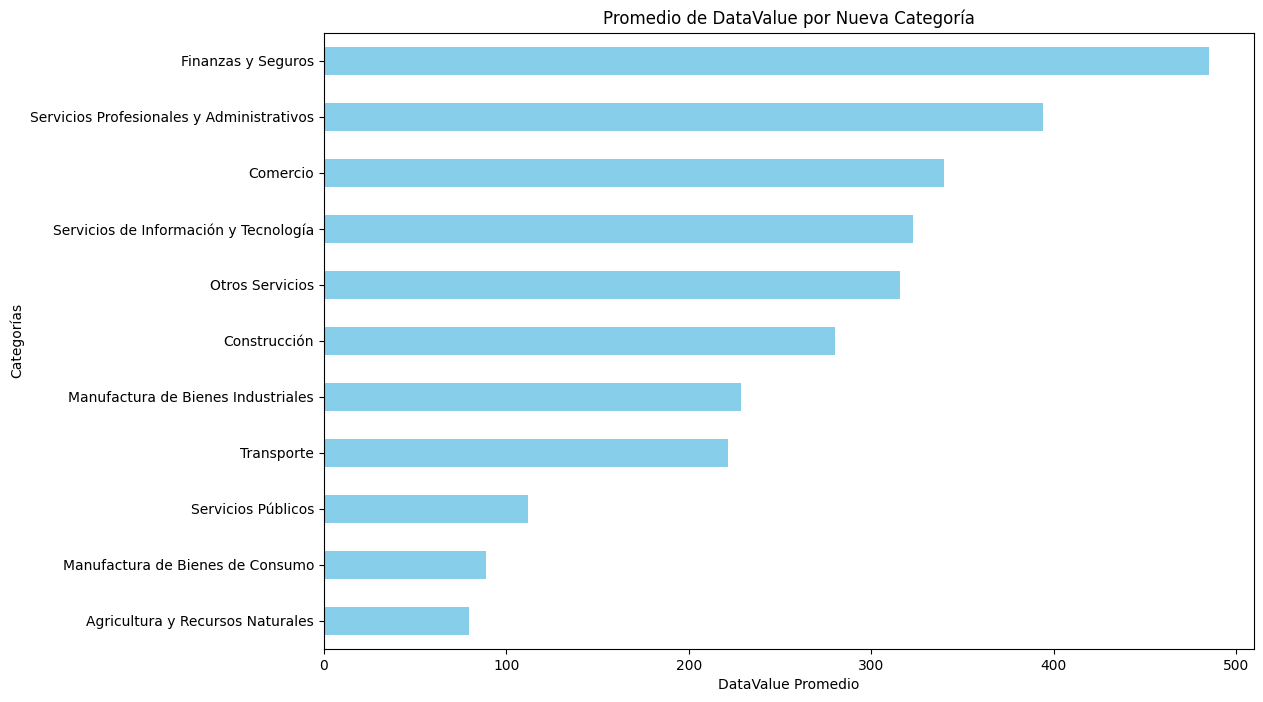

In [ ]:
import matplotlib.pyplot as plt

# Calcular el promedio de `DataValue` por categoría
avg_data_value = data.groupby('new_main_category')['datavalue'].mean().sort_values()

# Graficar el promedio de `DataValue` por categoría
plt.figure(figsize=(12, 8))
avg_data_value.plot(kind='barh', color='skyblue')
plt.title('Promedio de DataValue por Nueva Categoría')
plt.xlabel('DataValue Promedio')
plt.ylabel('Categorías')

plt.show()


# Tendencias Temporales Detalladas por Subcategoría

Generamos un gráfico de líneas para analizar la evolución temporal de `DataValue` en cada subcategoría. Esto permite observar patrones y fluctuaciones específicas de cada sector.


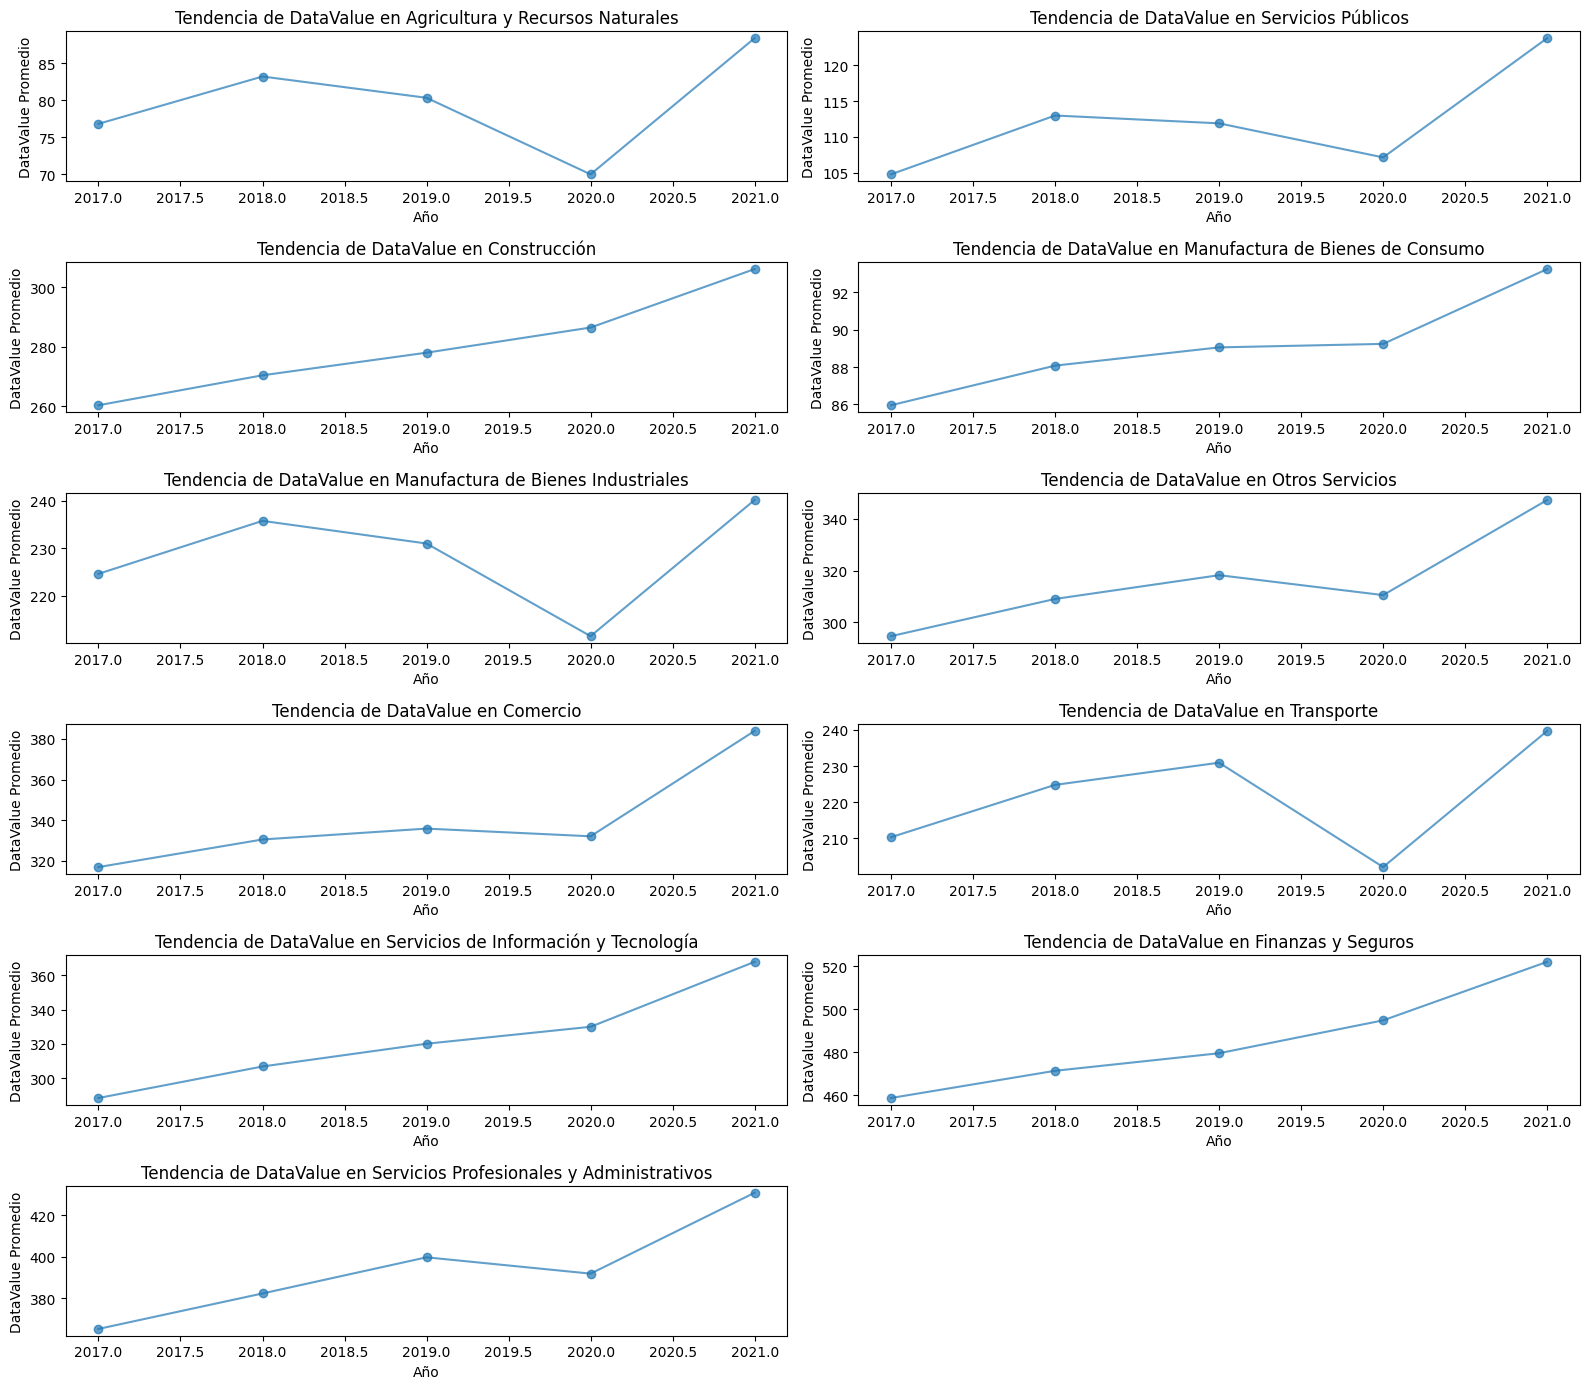

In [ ]:
# Configuración para múltiples subplots
plt.figure(figsize=(16, 14))
num_categories = data['new_main_category'].nunique()
rows = (num_categories // 2) + (num_categories % 2)

# Graficar tendencias temporales por subcategoría
for i, category in enumerate(data['new_main_category'].unique(), 1):
    subset = data[data['new_main_category'] == category]
    plt.subplot(rows, 2, i)
    subset.groupby('year')['datavalue'].mean().plot(marker='o', linestyle='-', alpha=0.7)
    plt.title(f"Tendencia de DataValue en {category}")
    plt.xlabel("Año")
    plt.ylabel("DataValue Promedio")

plt.tight_layout()
plt.show()


# Crecimiento Anual Promedio de `DataValue` por Categoría

Calculamos el crecimiento anual promedio para cada categoría principal. Esto es útil para identificar cuáles sectores están en expansión o contracción.


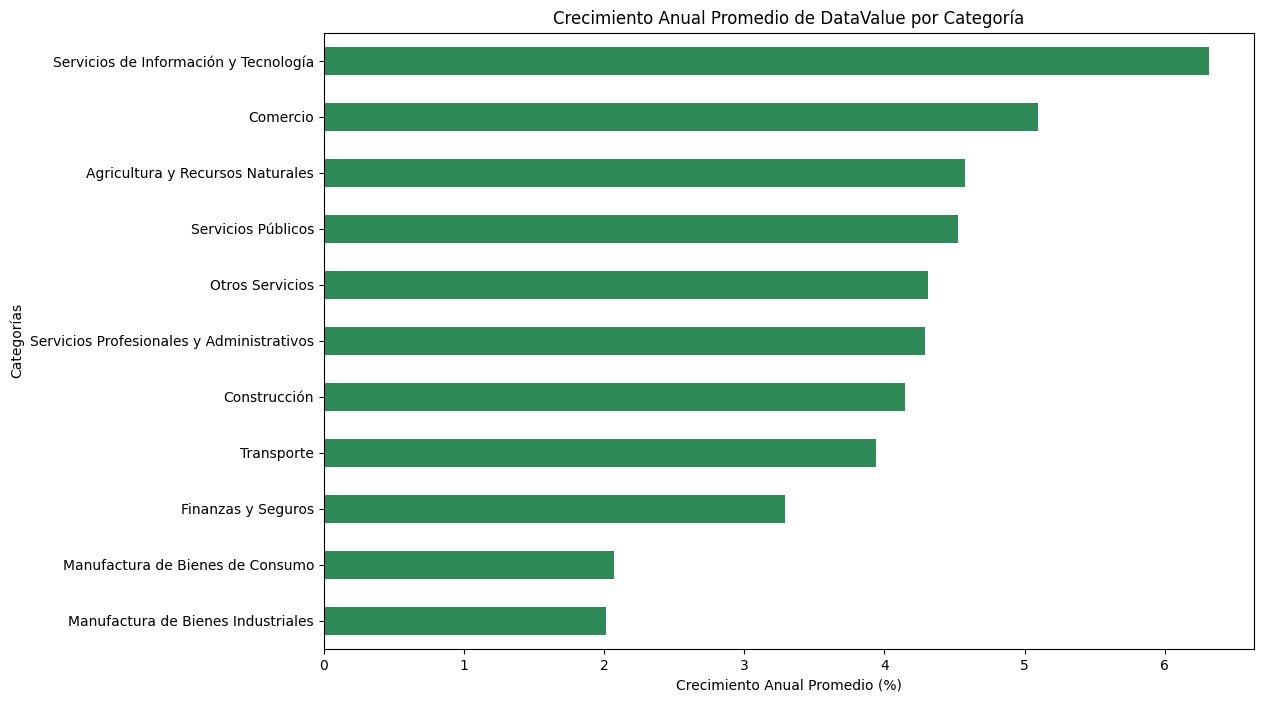

In [ ]:
# Cálculo del crecimiento anual en porcentaje
growth_data = data.groupby(['new_main_category', 'year'])['datavalue'].mean().unstack().pct_change(axis=1) * 100
avg_growth = growth_data.mean(axis=1)

# Graficar crecimiento anual promedio
plt.figure(figsize=(12, 8))
avg_growth.sort_values().plot(kind='barh', color='seagreen')
plt.title("Crecimiento Anual Promedio de DataValue por Categoría")
plt.xlabel("Crecimiento Anual Promedio (%)")
plt.ylabel("Categorías")

plt.show()


# Agrupación de Sectores en 10 Categorías Principales

Con base en la descripción de cada industria, agrupamos los datos en 10 categorías principales para facilitar el análisis. Creamos una nueva columna llamada `main_category` con estas categorías.


In [ ]:
import pandas as pd

# Cargar el archivo
file_path = '/content/gdp_by_industry.csv'
data = pd.read_csv(file_path)

# Visualizar las primeras filas para verificar la estructura
data.head()

# Eliminar la columna 'quarter' por ser redundante
data.drop(columns=['Quarter'], inplace=True)
data.drop(columns=['TableID'], inplace=True)
data.drop(columns=['NoteRef'], inplace=True)

# Renombrar columnas para estandarización
data.rename(columns={
    'Frequency': 'frequency',
    'Year': 'year',
    'Industry': 'industry',
    'IndustrYDescription': 'industry_description',
    'DataValue': 'data_value'
}, inplace=True)

# Verificar valores únicos en 'frequency' y eliminar la columna si solo hay un valor
if data['frequency'].nunique() == 1:
    data.drop(columns=['frequency'], inplace=True)

# Eliminar filas duplicadas, si existen
data.drop_duplicates(inplace=True)

# Diccionario para agrupar categorías en sectores amplios
industry_groups = {
    # Sector Primario
    'Agriculture, forestry, fishing, and hunting': 'Sector Primario',
    'Farms': 'Sector Primario',
    'Forestry, fishing, and related activities': 'Sector Primario',
    'Mining': 'Sector Primario',
    'Oil and gas extraction': 'Sector Primario',
    'Mining, except oil and gas': 'Sector Primario',
    'Support activities for mining': 'Sector Primario',

    # Sector Secundario
    'Manufacturing': 'Sector Secundario',
    'Food and beverage and tobacco products': 'Sector Secundario',
    'Textile mills and textile product mills': 'Sector Secundario',
    'Apparel and leather and allied products': 'Sector Secundario',
    'Petroleum and coal products': 'Sector Secundario',
    'Chemical products': 'Sector Secundario',
    'Wood products': 'Sector Secundario',
    'Paper products': 'Sector Secundario',
    'Machinery': 'Sector Secundario',
    'Motor vehicles, bodies and trailers, and parts': 'Sector Secundario',
    'Durable goods': 'Sector Secundario',
    'Nondurable goods': 'Sector Secundario',

    # Sector Terciario
    'Wholesale trade': 'Sector Terciario',
    'Retail trade': 'Sector Terciario',
    'Air transportation': 'Sector Terciario',
    'Rail transportation': 'Sector Terciario',
    'Truck transportation': 'Sector Terciario',
    'Warehousing and storage': 'Sector Terciario',
    'Information': 'Sector Terciario',
    'Publishing industries, except internet (includes software)': 'Sector Terciario',
    'Motion picture and sound recording industries': 'Sector Terciario',
    'Data processing, internet publishing, and other information services': 'Sector Terciario',

    # Sector Cuaternario
    'Professional, scientific, and technical services': 'Sector Cuaternario',
    'Legal services': 'Sector Cuaternario',
    'Computer systems design and related services': 'Sector Cuaternario',
    'Management of companies and enterprises': 'Sector Cuaternario',
    'Educational services': 'Sector Cuaternario',
    'Health care and social assistance': 'Sector Cuaternario',

    # Sector Público
    'Government': 'Sector Público',
    'Federal': 'Sector Público',
    'State and local': 'Sector Público',
    'General government': 'Sector Público',
    'National defense': 'Sector Público',
    'Nondefense': 'Sector Público',

    # Bienes Raíces y Servicios Financieros
    'Finance and insurance': 'Bienes Raíces y Servicios Financieros',
    'Real estate and rental and leasing': 'Bienes Raíces y Servicios Financieros',
    'Insurance carriers and related activities': 'Bienes Raíces y Servicios Financieros',
    'Federal Reserve banks, credit intermediation, and related activities': 'Bienes Raíces y Servicios Financieros',
    'Funds, trusts, and other financial vehicles': 'Bienes Raíces y Servicios Financieros',

    # Energía y Servicios Públicos
    'Utilities': 'Energía y Servicios Públicos',
    'Pipeline transportation': 'Energía y Servicios Públicos',

    #grandes industrias
    'Private industries': 'industria privada',
    'Compensation of employees': 'compensacion a empleados',
    'Taxes on production and imports less subsidies': 'tax y subsidios',
    # Otros
    'Gross domestic product': 'Otros',
    'Gross operating surplus': 'Otros',
}

# Crear la nueva columna con la agrupación
data['sector_group'] = data['industry_description'].map(industry_groups)

# Guardar el archivo limpio con la nueva columna de agrupación
data.to_csv('/content/gdp_by_industry_cleaned_grouped.csv', index=False)

# Visualizar las primeras filas del archivo limpio y agrupado
data.head()


,year,industry,industry_description,data_value,sector_group
0,2017,11,"Agriculture, forestry, fishing, and hunting",176.8,Sector Primario
1,2017,111CA,Farms,138.7,Sector Primario
2,2017,113FF,"Forestry, fishing, and related activities",38.1,Sector Primario
3,2017,21,Mining,267.3,Sector Primario
4,2017,211,Oil and gas extraction,161.1,Sector Primario


# Análisis de Distribución y Dispersión de `DataValue` por Subcategoría

Usamos gráficos de caja para observar la dispersión de `DataValue` en cada subcategoría. Esto ayuda a identificar la variabilidad y posibles valores atípicos.


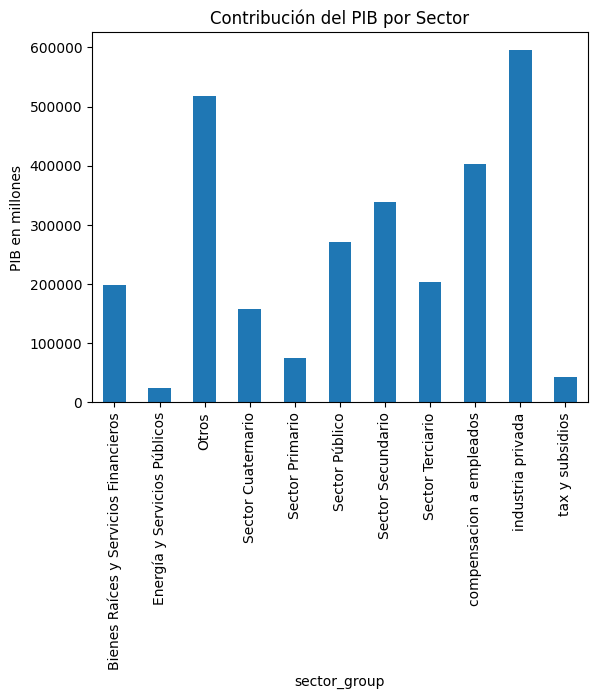

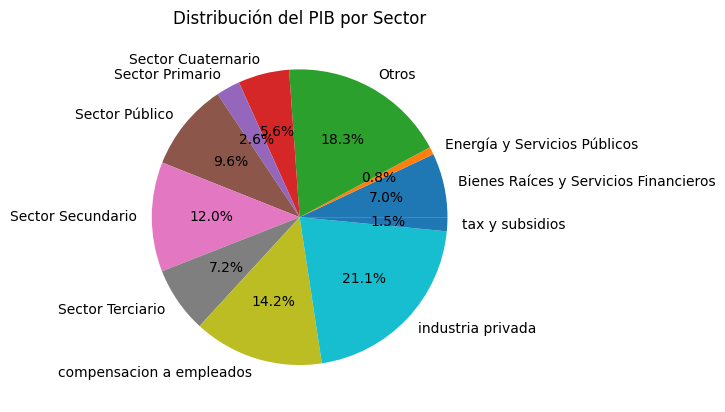

In [ ]:
import matplotlib.pyplot as plt

# Sumar el PIB por cada sector
pib_by_sector = data.groupby('sector_group')['data_value'].sum()

# Gráfico de barras
pib_by_sector.plot(kind='bar', title='Contribución del PIB por Sector')
plt.ylabel('PIB en millones')
plt.show()

# Gráfico circular
pib_by_sector.plot(kind='pie', autopct='%1.1f%%', title='Distribución del PIB por Sector')
plt.ylabel('')  # Ocultar etiqueta del eje Y
plt.show()


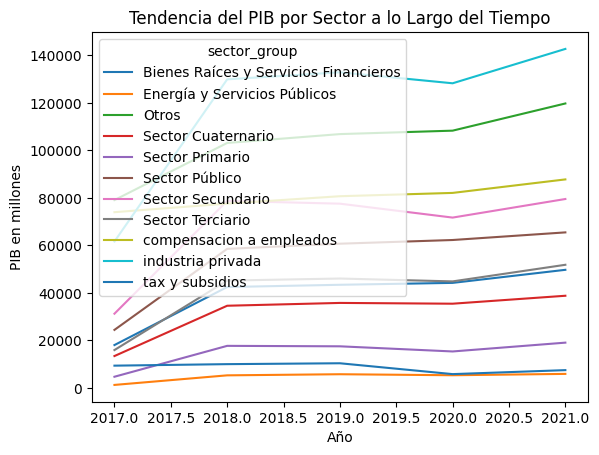

In [ ]:
# Sumar el PIB por sector y año
pib_by_sector_year = data.groupby(['year', 'sector_group'])['data_value'].sum().unstack()

# Gráfico de líneas para cada sector
pib_by_sector_year.plot(title='Tendencia del PIB por Sector a lo Largo del Tiempo')
plt.ylabel('PIB en millones')
plt.xlabel('Año')
plt.show()


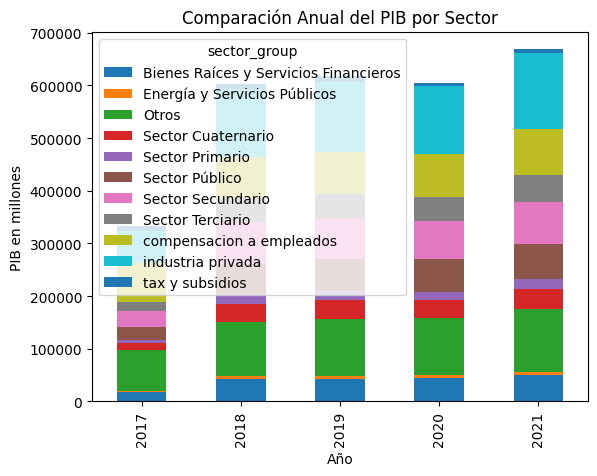

In [ ]:
pib_by_sector_year.plot(kind='bar', stacked=True, title='Comparación Anual del PIB por Sector')
plt.ylabel('PIB en millones')
plt.xlabel('Año')
plt.show()


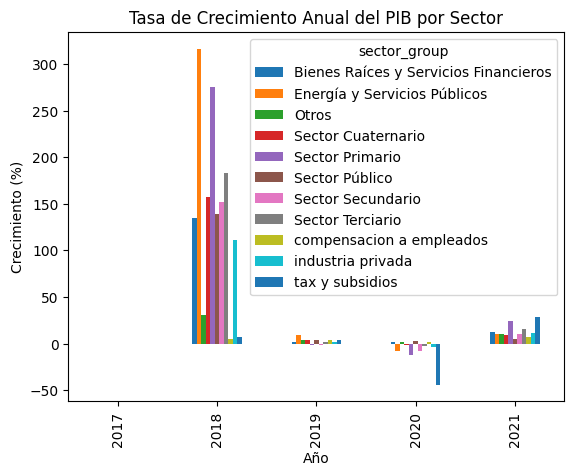

In [ ]:
# Calcular la tasa de crecimiento anual por sector
pib_growth = pib_by_sector_year.pct_change() * 100

# Gráfico de barras para visualizar el crecimiento por sector
pib_growth.plot(kind='bar', title='Tasa de Crecimiento Anual del PIB por Sector')
plt.ylabel('Crecimiento (%)')
plt.xlabel('Año')
plt.show()


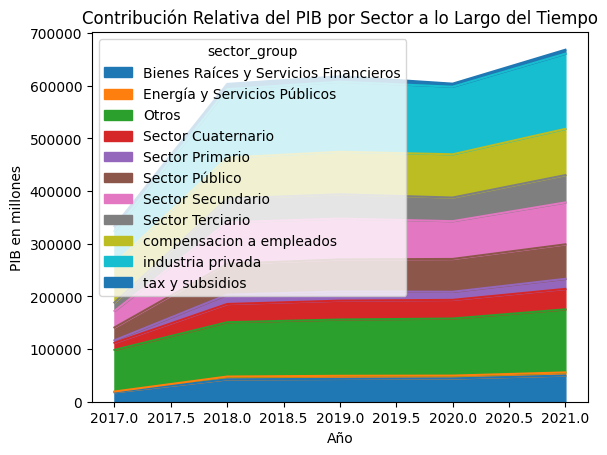

In [ ]:
pib_by_sector_year.plot(kind='area', stacked=True, title='Contribución Relativa del PIB por Sector a lo Largo del Tiempo')
plt.ylabel('PIB en millones')
plt.xlabel('Año')
plt.show()
